# **Tweets**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import seaborn as sns
import string

# data = pd.read_csv("/content/drive/MyDrive/DIC/Tweets/ukraine.csv")
data = pd.read_csv("/content/drive/MyDrive/DIC/Tweets/trans_italian.csv")
# data = pd.read_csv("/content/drive/MyDrive/DIC/Tweets/trans_french.csv")
print(data.head())

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


                userid       username  \
0  1380302501812047872  Lucia23670081   
1           1037754192    equinozio23   
2           3550261402    codeghino10   
3           3355724674        Carl6y6   
4  1416861548899885058   AurelieTembo   

                                            acctdesc location  following  \
0                                    Controcorrente!      NaN      509.0   
1                                 Prima i vaccinati!      NaN      297.0   
2          cerco di capire il mondo e di condividere      NaN       50.0   
3                                                NaN      NaN      915.0   
4  Je lutte contre l'injustice, toute forme de di...      NaN       98.0   

  followers  totaltweets               usercreatedts       tweetid  \
0     314.0      15279.0  2021-04-08 23:33:46.000000  1.509682e+18   
1     201.0      21298.0  2012-12-26 18:35:26.000000  1.509682e+18   
2     308.0     131792.0  2015-09-05 00:53:50.000000  1.509682e+18   
3     490.0     

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,5,10,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data.columns

Index(['userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'extractedts', 'processed_text', 'translated'],
      dtype='object')

In [3]:
data.rename(columns = {'translated':'tweet'}, inplace = True)

In [4]:
data

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,processed_text,tweet
0,1380302501812047872,Lucia23670081,Controcorrente!,NaN,509.0,314.0,15279.0,2021-04-08 23:33:46.000000,1.509682e+18,2022-04-01 00:00:13.000000,17.0,"🇷🇺#Lavrov: ""consideriamo inaccettabile la pres...","[{'text': 'Lavrov', 'indices': [23, 30]}, {'te...",it,NaN,0.0,2022-04-01 00:31:39.523805,consideriamo inaccettabile la presenza di qual...,we consider the presence of any military infra...
1,1037754192,equinozio23,Prima i vaccinati!,NaN,297.0,201.0,21298.0,2012-12-26 18:35:26.000000,1.509682e+18,2022-04-01 00:00:24.000000,104.0,#Santoro “Gli ucraini senza gli americani non ...,"[{'text': 'Santoro', 'indices': [12, 20]}, {'t...",it,NaN,0.0,2022-04-01 00:31:39.444685,Gli ucraini senza gli americani non vanno da n...,Ukrainians are going nowhere without the Ameri...
2,3550261402,codeghino10,cerco di capire il mondo e di condividere,NaN,50.0,308.0,131792.0,2015-09-05 00:53:50.000000,1.509682e+18,2022-04-01 00:00:26.000000,10.0,"Ucraina: ""I russi hanno confiscato 14 tonnella...","[{'text': 'guerra', 'indices': [91, 98]}, {'te...",it,NaN,0.0,2022-04-01 00:44:19.688575,Ucraina I russi hanno confiscato 14 tonnellate...,Ukraine The Russians confiscated 14 tons of hu...
3,3355724674,Carl6y6,NaN,NaN,915.0,490.0,35198.0,2015-07-02 19:33:44.000000,1.509682e+18,2022-04-01 00:00:27.000000,11.0,"A partire da questo venerdì, 1 aprile, ""i paes...",[],it,NaN,0.0,2022-04-01 00:09:34.909468,A partire da questo venerd 1 aprile i paesi os...,"Starting this Friday April 1st, countries host..."
4,1416861548899885058,AurelieTembo,"Je lutte contre l'injustice, toute forme de di...",NaN,98.0,141.0,7744.0,2021-07-18 20:48:56.000000,1.509682e+18,2022-04-01 00:01:04.000000,104.0,"Ucraina: Mosca, figlio Biden implicato in agen...","[{'text': 'guerra', 'indices': [80, 87]}, {'te...",it,NaN,0.0,2022-04-01 00:44:19.171848,Ucraina Mosca figlio Biden implicato in agenti...,Ukraine Moscow son Biden implicated in pathogens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82164,358626243,robymark1,NaN,NaN,968.0,551,98329.0,2011-08-20 06:44:22.000000,1.510209e+18,2022-04-02 10:55:48.000000,16,Probabilmente non sapremo mai cosa sia success...,"[{'text': 'Mariupol', 'indices': [90, 99]}]",it,NaN,0,2022-04-02 11:06:07.101357,Probabilmente non sapremo mai cosa sia success...,We will probably never know what really happen...
82165,168766524,Cielodigiove,Non saprete nulla.,Occidente,208.0,122,8942.0,2010-07-20 19:13:54.000000,1.510209e+18,2022-04-02 10:55:51.000000,0,@marioadinolfi Gli italiani sono tutti ex fasc...,"[{'text': 'Putin', 'indices': [77, 83]}]",it,NaN,0,2022-04-02 11:17:28.985869,Gli italiani sono tutti ex fascisti ed ex comu...,The Italians are all ex-fascists and ex-commun...
82166,2510425209,AdamoLoi,Sardo di nascita↔ Friulano d'adozione\n\nRugbi...,NaN,441.0,242,26057.0,2014-04-26 12:10:33.000000,1.510209e+18,2022-04-02 10:55:58.000000,13,"Giorno 38 della guerra di #Putin, immagini da ...","[{'text': 'Putin', 'indices': [40, 46]}, {'tex...",it,NaN,0,2022-04-02 11:17:28.710904,Giorno 38 della guerra di immagini da Sembra u...,Day 38 of the war of images from It looks like...
82167,2236327369,stefaniaespos19,Sono un account di satira quindi la mia non è ...,NaN,6.0,26,7801.0,2013-12-08 17:12:18.000000,1.510209e+18,2022-04-02 10:56:03.000000,0,@fattoquotidiano Se #USA avessero fornito armi...,"[{'text': 'USA', 'indices': [20, 24]}, {'text'...",it,NaN,0,2022-04-02 11:17:28.653449,Se avessero fornito armi a per anni le armi sa...,If they had been supplying weapons to for year...


In [5]:
data = data[["username", "tweet", "language"]]
data.isnull().sum()
data["language"].value_counts()

it    20810
0         2
Name: language, dtype: int64

In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


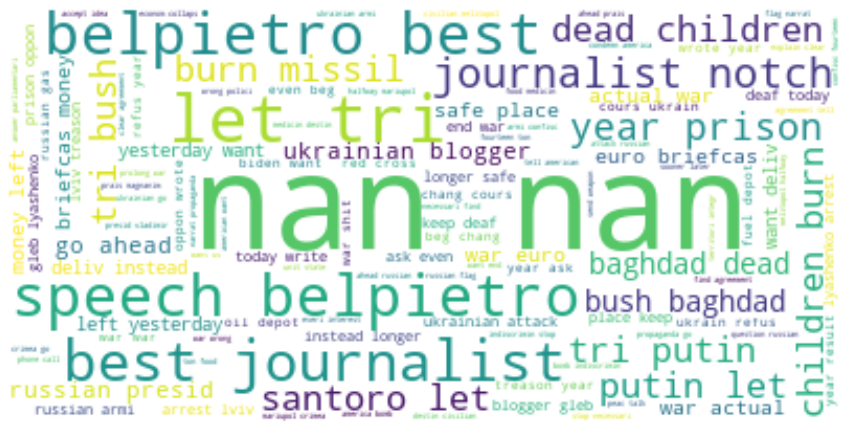

In [7]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


                                               tweet  Positive  Negative  \
0  consid presenc militari infrastructur unit sta...     0.000       0.0   
1  ukrainian go nowher without american prolong w...     0.398       0.0   
2       ukrain russian confisc  ton humanitarian aid     0.000       0.0   
3  start friday april  countri hostil acquir natu...     0.000       0.0   
4            ukrain moscow son biden implic pathogen     0.000       0.0   

   Neutral  
0    1.000  
1    0.602  
2    1.000  
3    1.000  
4    1.000  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
data.describe()

,Positive,Negative,Neutral
count,82169.000000,82169.000000,82169.000000
mean,0.028515,0.044559,0.925879
std,0.092857,0.127638,0.172113
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


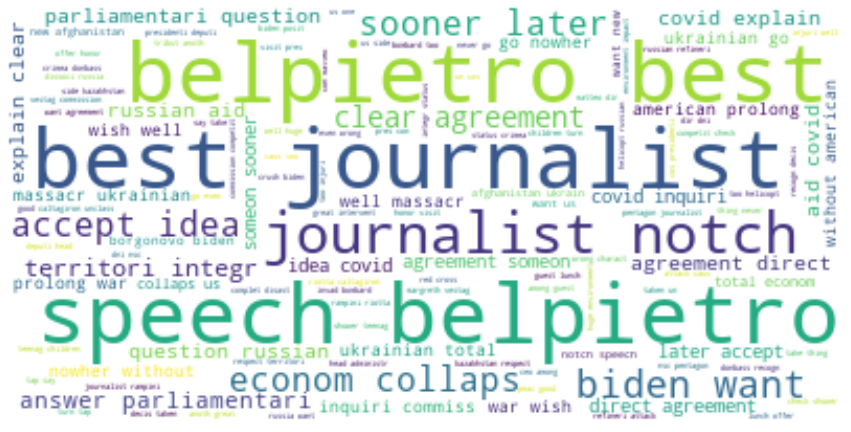

In [10]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

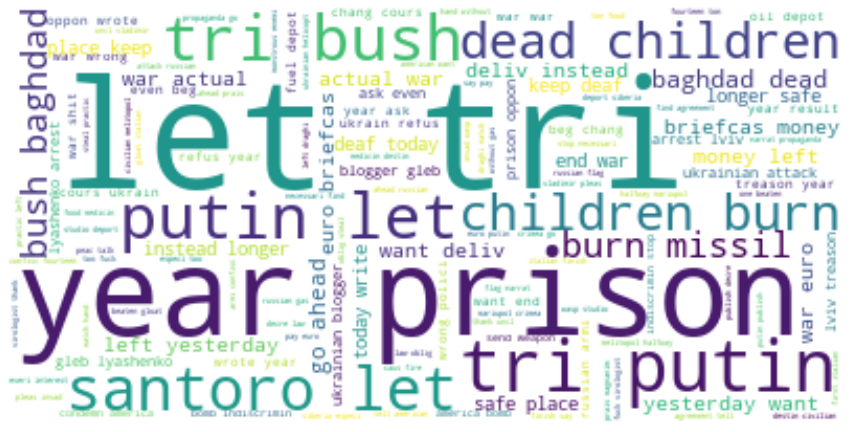

In [11]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()